In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math
import statistics as st


In [2]:
img = '4.jpg'

1 - Conversão RGB-YIQ-RGB

In [3]:
def split_rgb(imgarr, width, height):                        #SEPARA OS CANAIS RGB DA IMAGEM
    print('SEPARANDO E EXIBINDO CANAIS RGB')
    red = imgarr.copy()
    green = imgarr.copy()
    blue = imgarr.copy()

    for i in range(width):
        for j in range(height):
            red[j][i][1] = 0
            red[j][i][2] = 0
            green[j][i][0] = 0
            green[j][i][2] = 0
            blue[j][i][0] = 0
            blue[j][i][1] = 0
    
    fig = plt.figure(figsize=(30, 10))
    fig.add_subplot(1, 3, 1)
    plt.imshow(red)
    plt.axis('off')
    plt.title("Red")
    save(red, 'img_red_channel', 'jpg')

    fig.add_subplot(1, 3, 2)
    plt.imshow(green)
    plt.axis('off')
    plt.title("Green")
    save(green, 'img_green_channel', 'jpg')

    fig.add_subplot(1, 3, 3)
    plt.imshow(blue)
    plt.axis('off')
    plt.title("Blue")
    save(blue, 'img_blue_channel', 'jpg')

    
        
    '''redimg = Image.fromarray(red)
    redimg.save('red.jpg')'''
    '''
    greenimg = Image.fromarray(green)
    greenimg.save(name + '_green.' + filetype)
    blueimg = Image.fromarray(blue)
    blueimg.save(name + '_blue.' + filetype)
    '''
        
    return red, green, blue

In [4]:
def open_img(arqv):
    print('ABRINDO ARQUIVO')
    name = arqv.split(".")[0]
    filetype = arqv.split(".")[1]

    img = Image.open(arqv)
    print(img.format, img.size, img.mode)
    imgarr = np.array(img)

    fig = plt.figure(figsize=(5, 5))
    fig.add_subplot(1, 1, 1)
    plt.imshow(imgarr)
    plt.axis('off')
    plt.title("Original")

    return name, filetype, imgarr, img.size[0], img.size[1]

In [5]:
def save(arr, name, filetype):
    arqv = Image.fromarray(arr)
    arqv.save(name + '.' + filetype)

In [6]:
def rgb_yiq(red, green, blue, width, height):
    print('CONVERTENDO DE RGB PARA YIQ')
    yiq = np.zeros((height, width, 3))

    for z in range(width):
        for j in range(height):
            r = red[j][z][0]
            g = green[j][z][1]
            b = blue[j][z][2]

            y = (0.299*r) + (0.587*g) + (0.114*b)
            i = (0.596*r) - (0.274*g) - (0.322*b)
            q = (0.211*r) - (0.523*g) + (0.312*b)

            yiq[j][z][0] = y
            yiq[j][z][1] = i
            yiq[j][z][2] = q  
    
    return yiq

In [7]:
def yiq_rgb(yiq, width, height):
    print('CONVERTENDO DE YIQ PARA RGB')
    aux = np.zeros((height, width, 3), dtype=np.uint8)

    for z in range(width):
        for j in range(height):
            y = yiq[j][z][0]
            i = yiq[j][z][1]
            q = yiq[j][z][2]

            r = round((1.000*y) + (0.956*i) + (0.621*q))
            g = round((1.000*y) - (0.272*i) - (0.647*q))
            b = round((1.000*y) - (1.106*i) + (1.703*q))

            if r>255:
                r = 255

            if g>255:
                g = 255

            if b>255:
                b = 255

            if r<0:
                r = 0

            if g<0:
                g = 0

            if b<0:
                b = 0
            
            aux[j][z][0] = r
            aux[j][z][1] = g
            aux[j][z][2] = b

    return aux

ABRINDO ARQUIVO
JPEG (612, 358) RGB
SEPARANDO E EXIBINDO CANAIS RGB


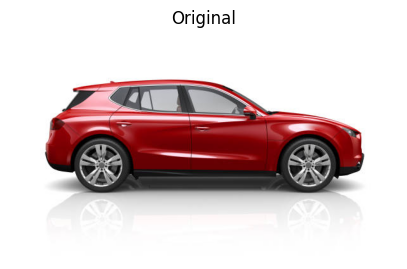

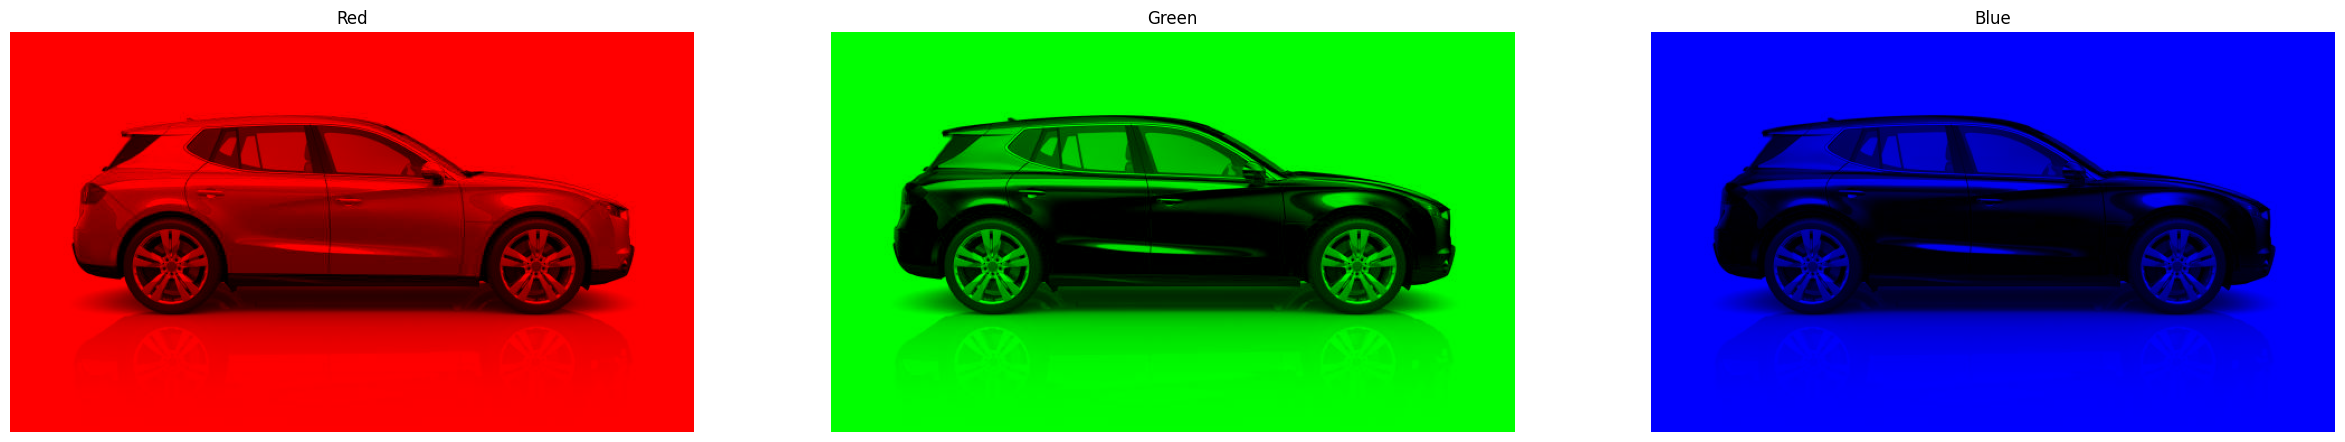

In [8]:
name, filetype, imgarr, width, height = open_img(img)  # abre arquivo

vermelho, verde, azul = split_rgb(imgarr, width, height) # separa canais rgb 

CONVERTENDO DE RGB PARA YIQ
CONVERTENDO DE YIQ PARA RGB
SEPARANDO E EXIBINDO CANAIS RGB


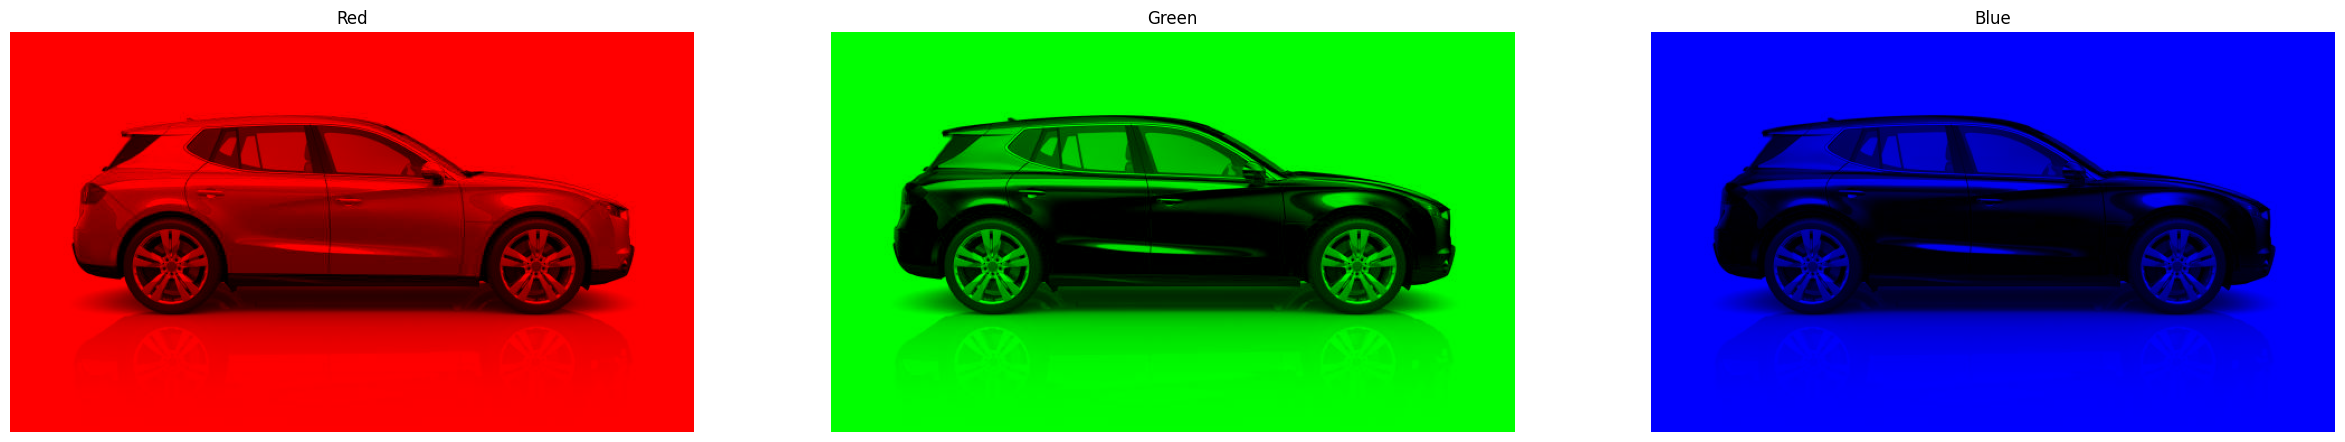

In [9]:
brilho = rgb_yiq(vermelho, verde, azul, width, height) # converte para yiq

conv = yiq_rgb(brilho, width, height) # converte para rgb

red2, green2, blue2 = split_rgb(conv, width, height) # exibe imagem resultante nos canais após a volta para rgb

2 - Negativo em R, G, B, RGB e Y

In [10]:
def negative(imgarr):
  redneg = imgarr.copy()
  greneg = imgarr.copy()
  bluneg = imgarr.copy()
  neg = imgarr.copy()

  redneg[:,:,0] = 255 - redneg[:,:,0]
  greneg[:,:,1] = 255 - greneg[:,:,1]
  bluneg[:,:,2] = 255 - bluneg[:,:,2]

  neg[:,:,0] = 255 - neg[:,:,0]
  neg[:,:,1] = 255 - neg[:,:,1]
  neg[:,:,2] = 255 - neg[:,:,2]

  fig = plt.figure(figsize=(20, 10))
  fig.add_subplot(2, 2, 1)
  plt.imshow(redneg)
  plt.axis('off')
  plt.title("Red Negative")
  save(redneg, 'img_red_negative', 'jpg')

  fig.add_subplot(2, 2, 2)
  plt.imshow(greneg)
  plt.axis('off')
  plt.title("Green Negative")
  save(greneg, 'img_green_negative', 'jpg')

  fig.add_subplot(2, 2, 3)
  plt.imshow(bluneg)
  plt.axis('off')
  plt.title("Blue Negative")
  save(bluneg, 'img_blue_negative', 'jpg')

  fig.add_subplot(2, 2, 4)
  plt.imshow(neg)
  plt.axis('off')
  plt.title("All negative")
  save(neg, 'img_negative', 'jpg')

In [11]:
def negative_y(yiq, width, height):
    aux = yiq.copy()
    aux[:,:,0] = 255 - aux[:,:,0] 

    neg_y_img = yiq_rgb(aux, width, height)

    fig = plt.figure(figsize=(5, 5))
    fig.add_subplot(1, 1, 1)
    plt.imshow(neg_y_img)
    plt.axis('off')
    plt.title("Y Negative")
    save(neg_y_img, 'img_y_negative', 'jpg')

CONVERTENDO DE YIQ PARA RGB


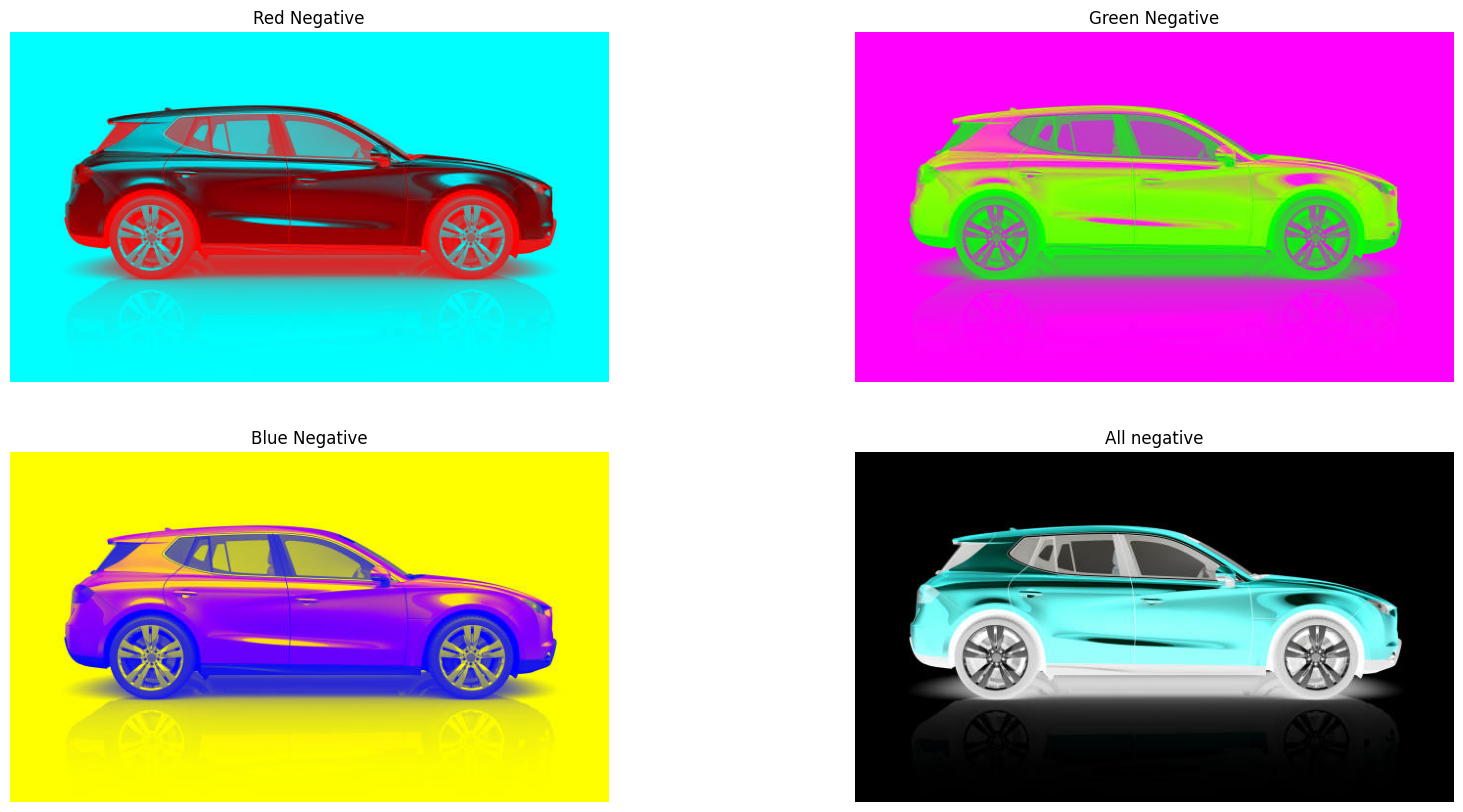

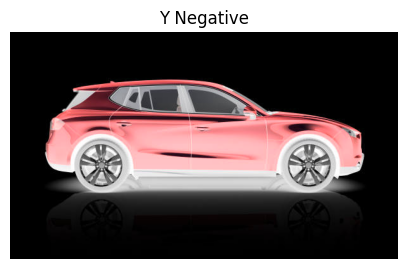

In [12]:
negative(imgarr)

negative_y(brilho, width, height)

5 - Controle de saturação no HSB

In [13]:
def rgb_hsb(imgarr,width,height):
    hsb = np.zeros((height, width, 3))

    for i in range(width):
        for j in range(height):
            r = imgarr[j,i,0]
            g = imgarr[j,i,1]
            b = imgarr[j,i,2]

            pR = r / 255
            pG = g / 255
            pB = b / 255

            high = max(pR, pG, pB)
            low = min(pR, pG, pB)
            delta = high - low

            if (delta == 0):
                hsb[j,i,0] = 0
            elif (high == pR):
                hsb[j,i,0] = (60 * (((pG  - pB) / delta) % 6))
            elif (high == pG):
                hsb[j,i,0] = (60 * (((pB  - pR) / delta) + 2))
            elif (high == pB):
                hsb[j,i,0] = (60 * (((pR  - pG) / delta) + 4))

            #hsb[j,i,0] = round(hsb[j,i,0])

            if (high == 0):
                hsb[j,i,1] = 0
            else:
                hsb[j,i,1] = delta / high

            hsb[j,i,2] = high

    return hsb
    

In [14]:
def hsb_rgb(hsb, width,height):
    aux = np.zeros((height, width, 3), dtype=np.uint8)
    r1 = 0
    g1 = 0
    b1 = 0

    for i in range(width):
        for j in range(height):
            h = hsb[j][i][0]
            s = hsb[j][i][1]
            b = hsb[j][i][2]

            hs = h / 60.0
            h1 = math.floor(hs)
            sext = int(h1) % 6
            f = hs - h1

            x = b * (1 - s)
            y = b * (1 - f * s)
            z = b * (1 - (1 - f) * s)

            if sext == 0:
                r1 = b
                g1 = z
                b1 = x
            elif sext == 1:
                r1 = y
                g1 = b
                b1 = x
            elif sext == 2:
                r1 = x
                g1 = b
                b1 = z
            elif sext == 3:
                r1 = x
                g1 = y
                b1 = b
            elif sext == 4:
                r1 = z
                g1 = x
                b1 = b
            elif sext == 5:
                r1 = b
                g1 = x
                b1 = y

            aux[j][i][0] = r1 * 255
            aux[j][i][1] = g1 * 255
            aux[j][i][2] = b1 * 255
            
    return aux    

In [48]:
def saturation(imgarr, width, height, num):

    '''if num > 1:
        print('Artefatos!')'''
    
    ''' for i in range(width):
        for j in range(height):
            if aux[j][i][1] > 1.0:
                print(aux[j][i][1])'''

    hsb = rgb_hsb(imgarr, width, height)

    aux = hsb.copy()
    
    aux[:,:,1] = aux[:,:,1] * num
    
    for i in range(width):
        for j in range(height):
            if aux[j][i][1] > 1.0:
                aux[j][i][1] = 1.0

    rgb = hsb_rgb(aux, width, height)

    fig = plt.figure(figsize=(20, 10))
    fig.add_subplot(1, 2, 1)
    plt.imshow(imgarr)
    plt.axis('off')
    plt.title("Original saturation")

    fig.add_subplot(1, 2, 2)
    plt.imshow(rgb)
    plt.axis('off')
    plt.title("Saturation changed")
    save(rgb, 'img_saturation_change', 'jpg')

    return rgb

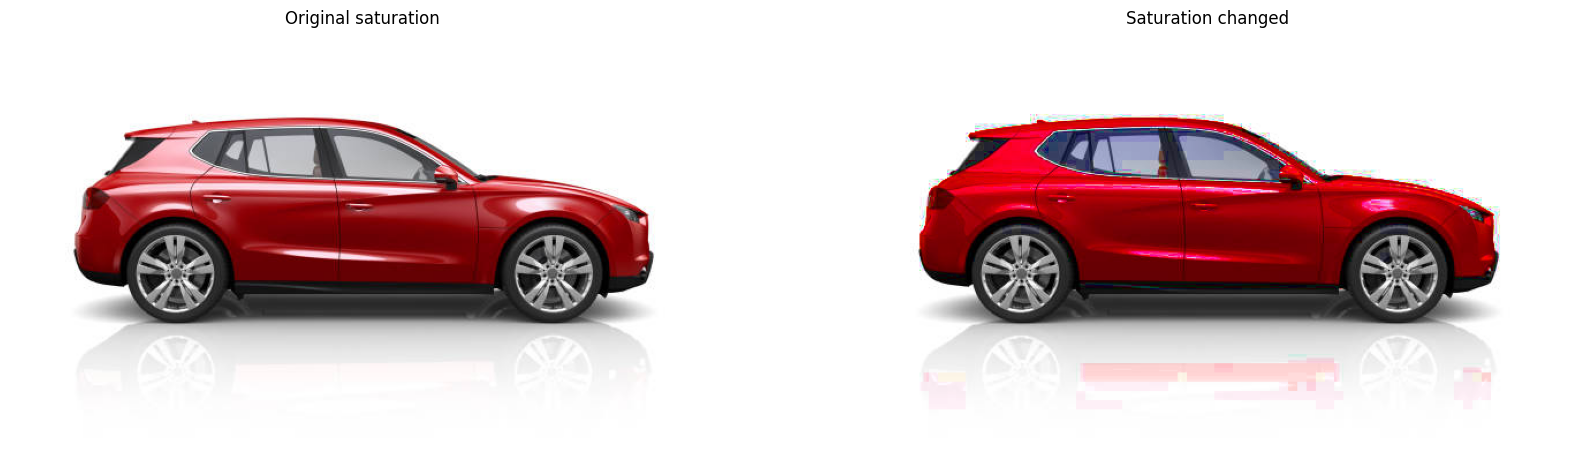

In [53]:
insatured = saturation(imgarr, width, height, 7)

4 - Filtro mediana m x n, com m e n ímpares

In [17]:
def median_filter(imgarr, width, height, x_filter, y_filter):

    piv_x = int(x_filter/2)
    piv_y = int(y_filter/2)
    
    #Definindo limites do for com base nos valores ímpares das 
    #dimensões da mascara
    start_r = piv_x
    end_r = width - piv_x
    start_mask_x = -1 * piv_x           # pivo no meio, entao inicio é -pivo
    end_mask_x = piv_x + 1              # pivo+1 porque o for vai ate fim-1
    
    start_c = piv_y
    end_c = height - piv_y
    start_mask_y = -1 * piv_y       
    end_mask_y = piv_y + 1

    w_out = end_r - start_r
    h_out = end_c - start_c

    mask = np.zeros((x_filter, y_filter, 3), dtype=np.uint8)
    out = np.zeros((w_out, h_out, 3), dtype=np.uint8)             

    sel_r = []
    sel_g = []
    sel_b = []

    for i in range(start_r, end_r):
        for j in range(start_c, end_c):
            now_r = i - start_r
            now_c = j - start_c

            for k in range(start_mask_x, end_mask_x):
                for l in range(start_mask_y, end_mask_y):
                    r, g, b = imgarr[i-k][j-l]
                    sel_r.append(r)
                    sel_g.append(g)
                    sel_b.append(b)

            out[now_r][now_c][0] = st.median(sel_r) 
            out[now_r][now_c][1] = st.median(sel_g) 
            out[now_r][now_c][2] = st.median(sel_b) 

            sel_r = []
            sel_g = []
            sel_b = []
    
    fig = plt.figure(figsize=(5, 5))
    fig.add_subplot(1, 1, 1)
    plt.imshow(out)
    plt.axis('off')
    plt.title("Median filter")
    save(out, 'img_median', 'jpg')

    return out

In [18]:
out = median_filter(imgarr, width, height, 1, 21)


IndexError: index 358 is out of bounds for axis 0 with size 358

In [ ]:
# ---------------- MAIN ----------------------- 

'''name, filetype, imgarr, width, height = open_img('2.tif')  # abre arquivo

vermelho, verde, azul = split_rgb(imgarr, width, height) # separa canais rgb

brilho = rgb_yiq(vermelho, verde, azul, width, height) # converte para yiq

conv = yiq_rgb(brilho, width, height) # converte para rgb

red2, green2, blue2 = split_rgb(conv, width, height) 

#solo_channel_img(red2, green2, blue2, 'convertido', 'jpg')

negative(imgarr)

negative_y(brilho, width, height)'''

"name, filetype, imgarr, width, height = open_img('2.tif')  # abre arquivo\n\nvermelho, verde, azul = split_rgb(imgarr, width, height) # separa canais rgb\n\nbrilho = rgb_yiq(vermelho, verde, azul, width, height) # converte para yiq\n\nconv = yiq_rgb(brilho, width, height) # converte para rgb\n\nred2, green2, blue2 = split_rgb(conv, width, height) \n\n#solo_channel_img(red2, green2, blue2, 'convertido', 'jpg')\n\nnegative(imgarr)\n\nnegative_y(brilho, width, height)"